### Import necessary packages

In [709]:
from datetime import datetime
#import it in console with: pip install pandas-datareader
import pandas_datareader.data as wb
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import matplotlib as mpl

### Load the data
Input:

| Argument   | Description                             |
|------------|-----------------------------------------|
| ticker     | list of choosen tickers                 |
| start_date | starte date of search in YYY-M-D format |
| end_date   | end of date search in YYYY-M-D format   |

Output: Pandas DataFrame with finance data from Yahoo

In [710]:
def get_data_from_api(ticker, start_date, end_date):
    dataframe = wb.DataReader(ticker, 'yahoo', start_date, end_date)
    return dataframe
start = datetime(2017,4,4)
end = datetime(2021,4,4)
df = get_data_from_api("MSFT", start, end)
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-04,65.809998,65.279999,65.389999,65.730003,12997400.0,61.857750
2017-04-05,66.349998,65.440002,66.300003,65.559998,21448600.0,61.697758
2017-04-06,66.059998,65.480003,65.599998,65.730003,18103500.0,61.857750


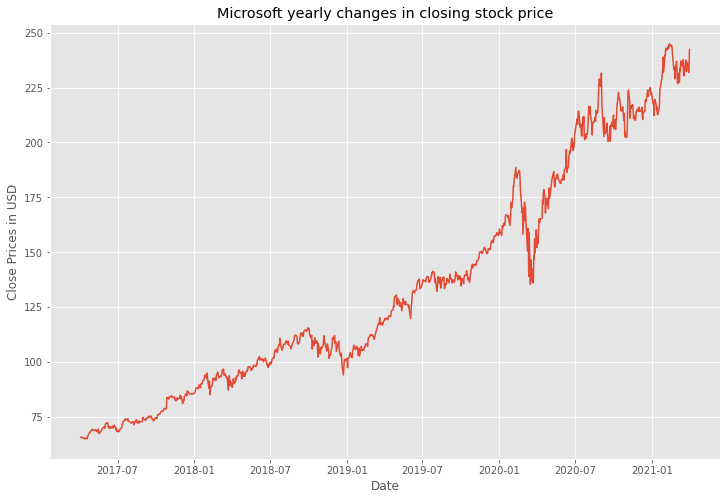

In [711]:
#plot close price
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices in USD')
plt.plot(df['Close'])
plt.title('Microsoft yearly changes in closing stock price')
plt.show()

### Visualize moving averages
Calculate moving averages based on closing price with a window of 5, 20, 100, and 200 days

In [712]:
close_px = df['Close']
MA5 = close_px.rolling(window = 5).mean()
MA20 = close_px.rolling(window = 20).mean()
MA100 = close_px.rolling(window = 100).mean()
MA200 = close_px.rolling(window = 200).mean()

Close price VS Moving Average 5/20/100/200 days of MSFT

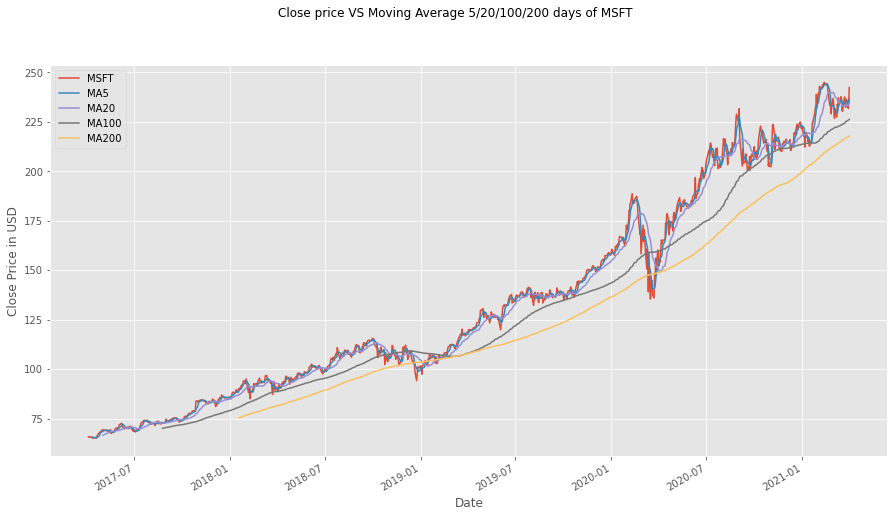

In [713]:
mpl.rc('figure', figsize=(15, 8))
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA5.plot(label = 'MA5')
MA20.plot(label = 'MA20')
MA100.plot(label = 'MA100')
MA200.plot(label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 5/20/100/200 days of MSFT')
plt.legend()

Close price VS Moving Average 5 days of MSFT

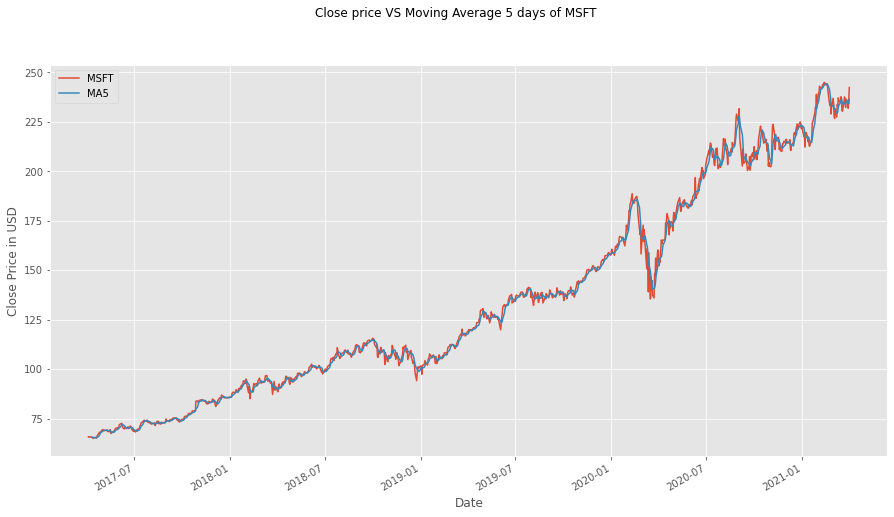

In [714]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA5.plot(label = 'MA5')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 5 days of MSFT')
plt.legend()

Close price VS Moving Average 20 days of MSFT

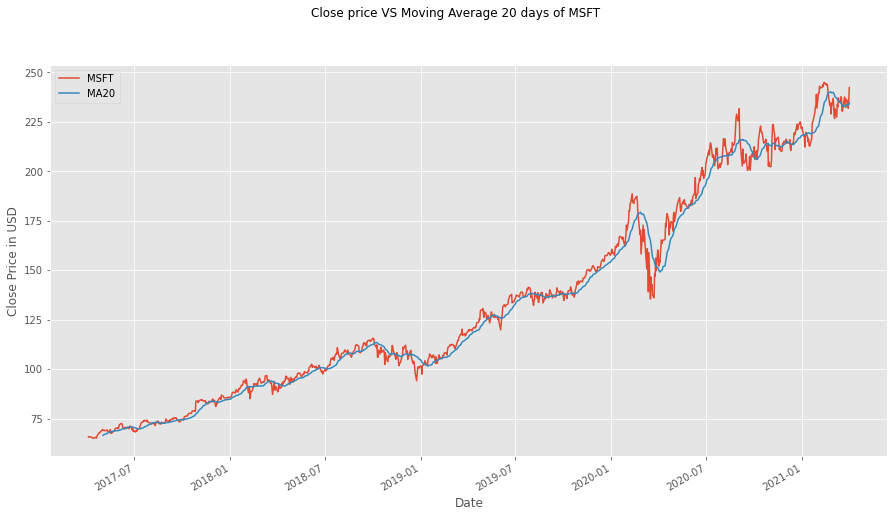

In [715]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA20.plot(label = 'MA20')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 20 days of MSFT')
plt.legend()

Close price VS Moving Average 100 days of MSFT

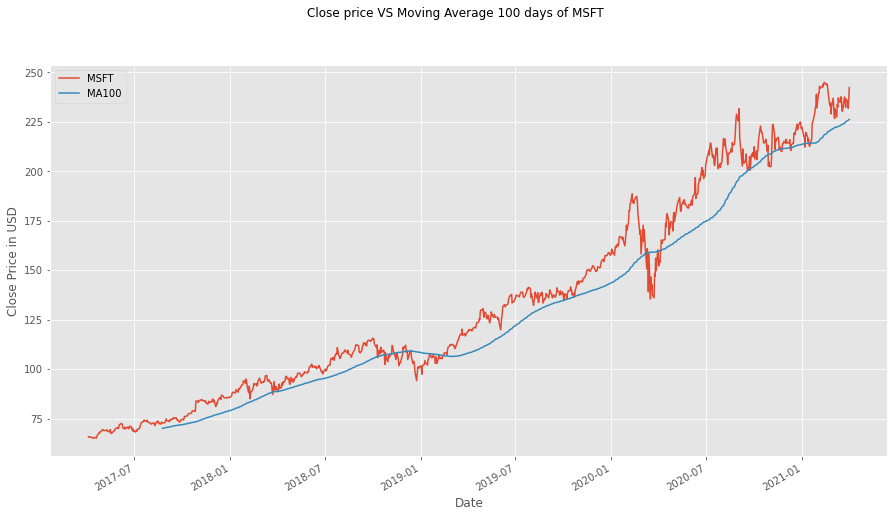

In [716]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA100.plot(label = 'MA100')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 100 days of MSFT')
plt.legend()

Close price VS Moving Average 200 days of MSFT

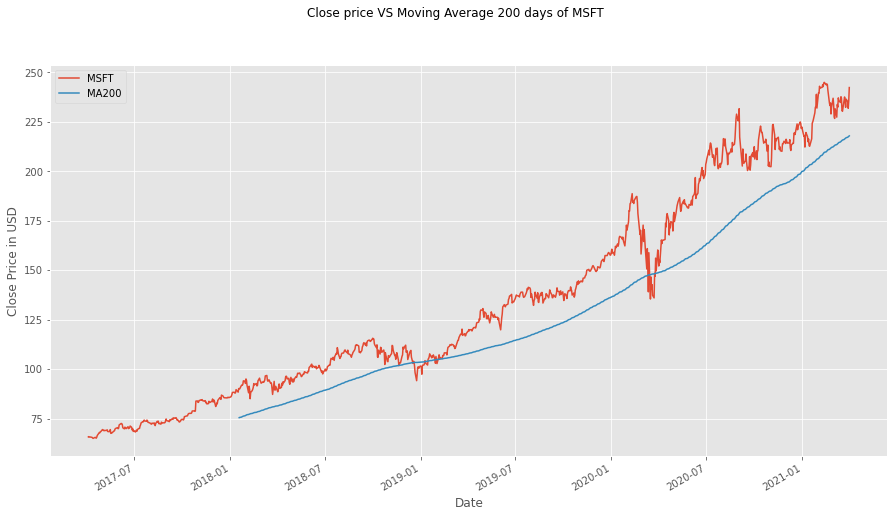

In [717]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA200.plot(label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 200 days of MSFT')
plt.legend()

### Preprocess data for showing MA in 2020

In [718]:
#Seperate dataframe so we keep original for further exploration
ma_df = df
#Set index as datetime
ma_df.index = pd.to_datetime(ma_df.index)
#Set label by shifting Closing price by -1
ma_df['Label'] = ma_df['Close'].shift(-1)
#Log_r
log_r = np.log(ma_df['Close'] / ma_df['Close'].shift(1))

#Drop non-used columns
ma_df = ma_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)

#Drop NaN values
ma_df = ma_df.dropna()

#Standarizing
ma_df = (ma_df - ma_df.mean())/ma_df.std()

## rolling mean
close_px = ma_df['Close']
ma_df['MA5'] = close_px.rolling(5,min_periods=1).mean()
ma_df['MA20'] = close_px.rolling(20,min_periods=1).mean()
ma_df['MA100'] = close_px.rolling(100,min_periods=1).mean()
ma_df['MA200'] = close_px.rolling(200,min_periods=1).mean()
print(ma_df.tail())

               Close     Label       MA5      MA20     MA100     MA200
Date                                                                  
2021-03-25  1.913057  1.988024  1.952265  1.933356  1.768355  1.608592
2021-03-26  1.994056  1.963795  1.976252  1.937366  1.775009  1.612470
2021-03-29  1.969796  1.897555  1.973317  1.935703  1.781448  1.617261
2021-03-30  1.903470  1.974151  1.950896  1.933727  1.786422  1.621576
2021-03-31  1.980165  2.102721  1.952109  1.941759  1.790213  1.626157


MA5 and close price in 2020

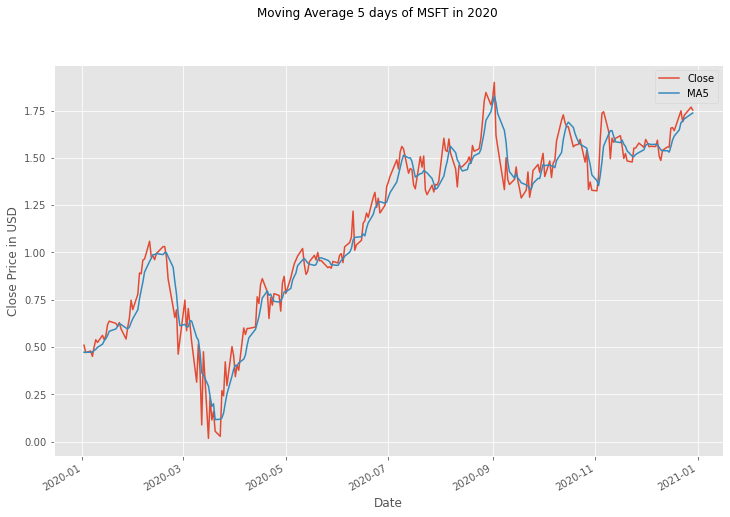

In [719]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA5'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA5')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 5 days of MSFT in 2020')
plt.legend()


MA20 and close price in 2020

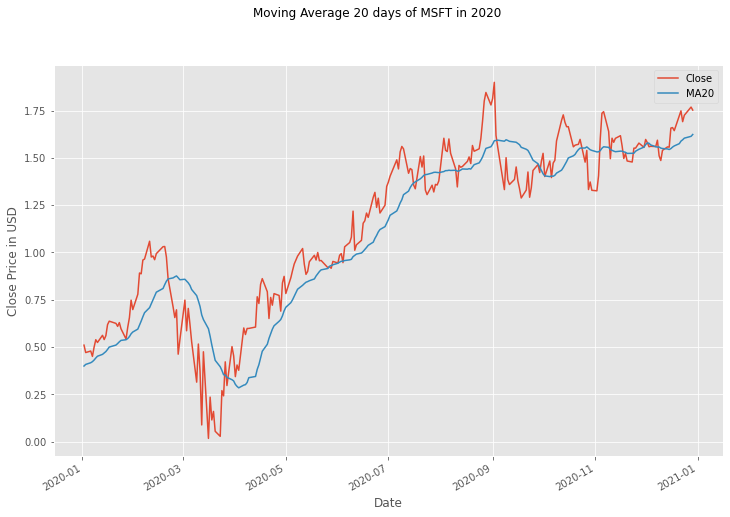

In [720]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA20'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA20')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 20 days of MSFT in 2020')
plt.legend()

MA100 and close price in 2020

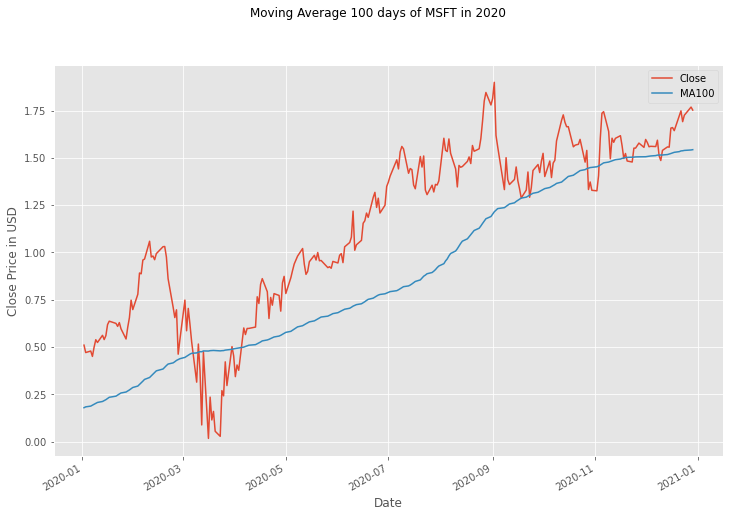

In [721]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA100'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA100')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 100 days of MSFT in 2020')
plt.legend()


MA200 and close price in 2020

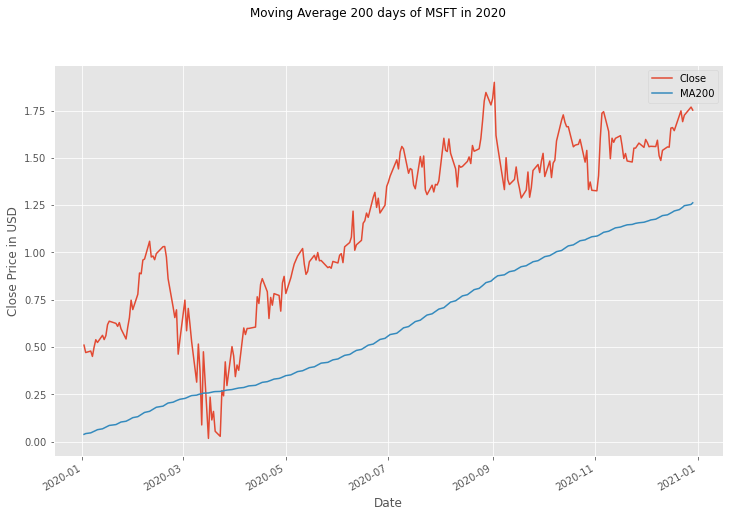

In [722]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA200'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 200 days of MSFT in 2020')
plt.legend()


Plot these four MA values with close price in the same chart

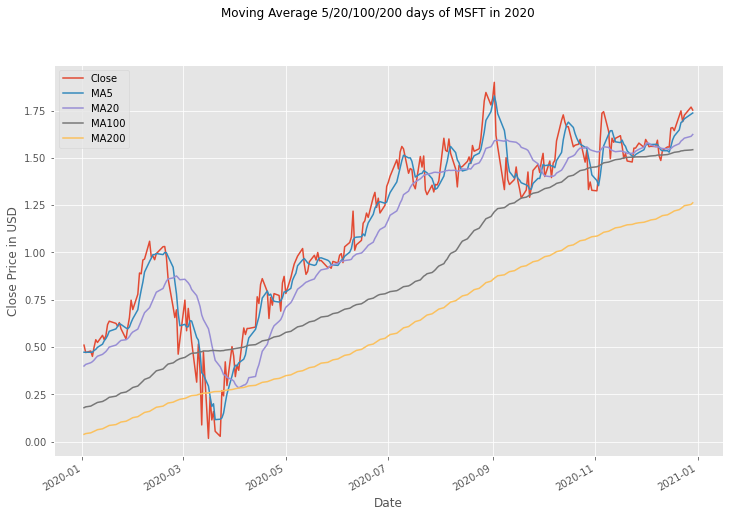

In [723]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df["MA5"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA5')
ma_df["MA20"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA20')
ma_df["MA100"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA100')
ma_df["MA200"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA200')

plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 5/20/100/200 days of MSFT in 2020')
plt.legend()

## Pre-process data function
Since the various models require somewhat different pre-processing a function that handles the various needs is created.

| Argument         | Description                                                  |
|------------------|--------------------------------------------------------------|
| raw_df           | Dataframe input                                              |
| Standarize       | Boolean if the data should be standarized or not             |
| Drop_standard    | Boolean if standard values should be removed or not          |
| calculation      | Array containing which calculations that should be performed |
| calculations []  | MA5, MA20, MIN, MAX, mom, vola                               |

In [724]:
#Preprocess data
def process_data(raw_df, standarize, drop_standard, calculations):
        #Set index as datetime
        raw_df.index = pd.to_datetime(raw_df.index)
        #Set label by shifting Closing price by -1
        raw_df['Label'] = raw_df['Close'].shift(-1)
         #Creating more features
        #Log_r
        log_r = np.log(raw_df['Close'] / raw_df['Close'].shift(1))
        max_roll_window = 0
        #Check which calculations should be applied
        if 'MA5' in calculations:
            raw_df['MA5'] = raw_df['Close'].rolling(5).mean()
            max_roll_window = 5
        if 'MA20' in calculations:
            raw_df['MA20'] = raw_df['Close'].rolling(20).mean()
            max_roll_window = 20
        if 'MIN' in calculations:
            raw_df['MIN'] = raw_df['Close'].rolling(20).min()
        if 'MAX' in calculations:
            raw_df['MAX'] = raw_df['Close'].rolling(20).max()
        if 'mom' in calculations:
            raw_df['mom'] = log_r.rolling(20).mean()
            print(max_roll_window)
        if 'vola' in calculations:
            raw_df['vola'] = log_r.rolling(20).std()

        #Drop non-used columns
        if drop_standard:
            raw_df = raw_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        #Drop NaN values
        raw_df = raw_df.dropna()
        #Standarizing
        if standarize:
            raw_df = (raw_df - raw_df.mean())/raw_df.std()
        return raw_df

### Pre-process data for models

In [733]:
proc_df = process_data(df, False, True, ['MA5', 'MA20', 'MIN', 'MAX'])
proc_df.head(10)

,Close,Label,MA5,MA20,MIN,MAX
Date,,,,,,
2017-05-02,69.300003,69.080002,68.654001,66.521001,64.949997,69.410004
2017-05-03,69.080002,68.809998,68.904001,66.688501,64.949997,69.410004
2017-05-04,68.809998,69.000000,69.012001,66.851001,64.949997,69.410004
2017-05-05,69.000000,68.940002,69.120001,67.014500,64.949997,69.410004
2017-05-08,68.940002,69.040001,69.026001,67.177501,64.949997,69.410004
2017-05-09,69.040001,69.309998,68.974001,67.353001,64.949997,69.410004
2017-05-10,69.309998,68.459999,69.020000,67.544500,64.949997,69.410004
2017-05-11,68.459999,68.379997,68.950000,67.706000,64.949997,69.410004
2017-05-12,68.379997,68.430000,68.825999,67.877500,65.040001,69.410004


#### Split data into training and test with a 80-20 split

In [734]:
#Split data
import math
# Array splicing and splitting of data
df_np = proc_df.to_numpy()

X, y = df_np[:, :-1], df_np[:, -1]

# pct split
limit = math.floor(len(X) * 0.8)

X_train, X_test = X[:limit,:],X[limit:,:]

y_train, y_test = y[:limit],y[limit:]


## Linear Regression

In [735]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)
linear_predictions = model.predict(X_test)
print("Actual: ", y_test[:10])
print("Forecasted: ", linear_predictions[:10])

Actual:  [196.83999634 196.83999634 200.57000732 201.91000366 201.91000366
 201.91000366 201.91000366 201.91000366 203.50999451 204.69999695]
Forecasted:  [194.26999289 195.05661819 197.29135428 198.89245931 199.44057952
 200.18204296 200.53039168 202.30763325 204.74903061 206.45820302]


<Figure size 1200x640 with 0 Axes>

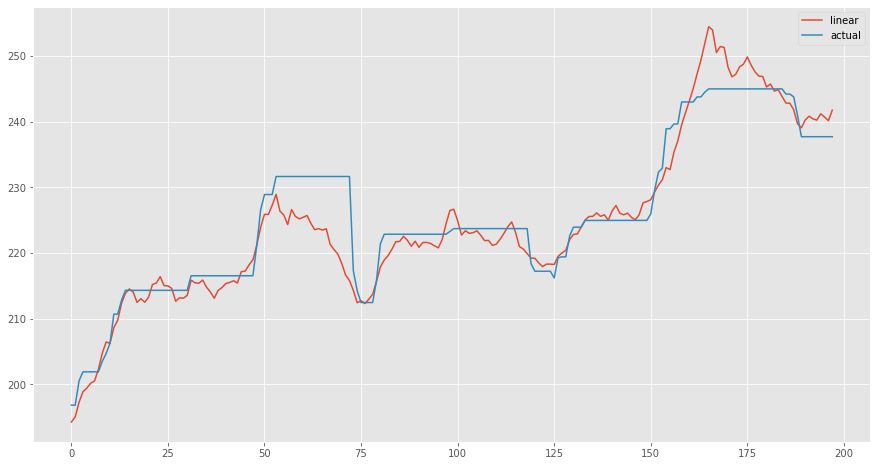

In [736]:
##Visualize the predictions
#Visualize to understand the model behaviour
plt.figure(figsize = (15,8), dpi = 80)
df_pred = pd.DataFrame(data = linear_predictions, columns = ["linear"])
df_pred["actual"] = y_test.tolist()
df_pred.plot()
plt.show()

## MLP Regression

In [737]:
from sklearn.neural_network import MLPRegressor
#MLP
rnd_state = 1
max_it = 500
regr = MLPRegressor(random_state = rnd_state, max_iter = max_it).fit(X_train, y_train)
print(regr.score(X_train, y_train))
MLPpredictions = regr.predict(X_test)
print(regr.score(X_test, y_test))


0.9974514443111
0.89039404323173


<Figure size 1200x640 with 0 Axes>

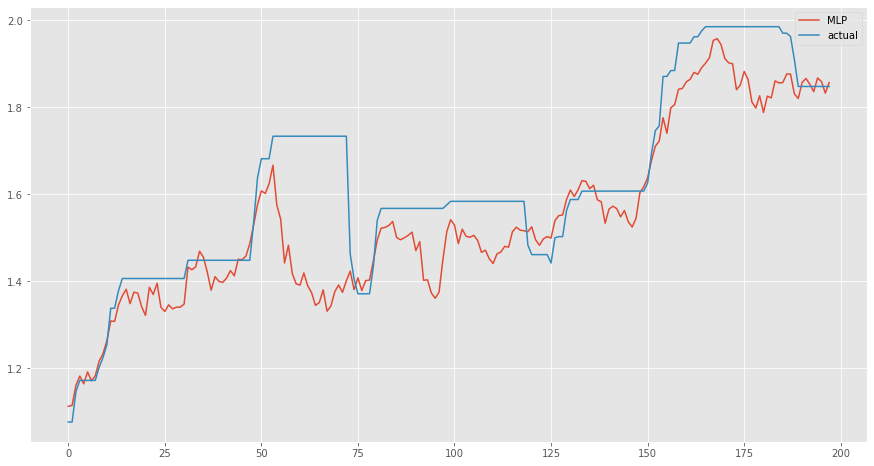

In [730]:
##Visualize the predictions
#Visualize to understand the model behaviour
plt.figure(figsize = (15,8), dpi = 80)
df_pred = pd.DataFrame(data = MLPpredictions, columns = ["MLP"])
df_pred["actual"] = y_test.tolist()
df_pred.plot()
plt.show()

## Visualize the prediction of both models

<Figure size 1200x640 with 0 Axes>

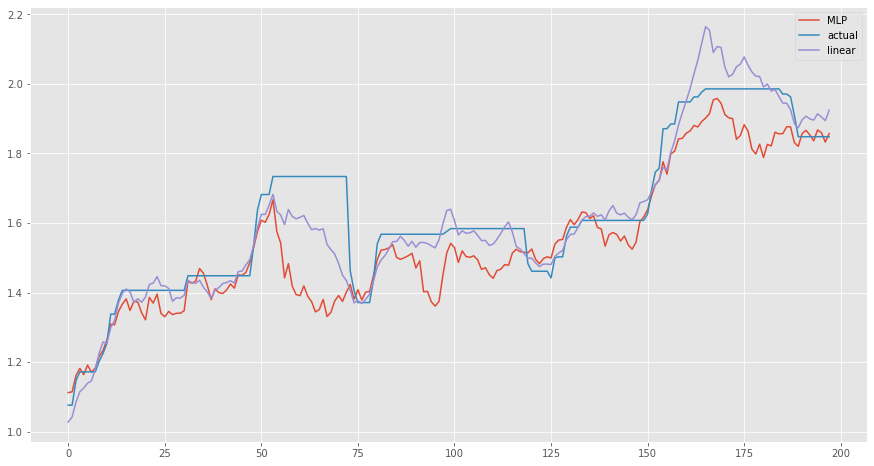

In [731]:
plt.figure(figsize = (15,8), dpi = 80)
df_pred = pd.DataFrame(data = MLPpredictions, columns = ["MLP"])
df_pred["actual"] = y_test.tolist()
df_pred["linear"] = linear_predictions.tolist()
df_pred.plot()
plt.show()


## ARIMA MODEL

                Close
Date                 
2017-04-04  65.730003
2017-04-05  65.559998
2017-04-06  65.730003
2017-04-07  65.680000
2017-04-08  65.630000
Testing Mean Squared Error is 8.631063030866


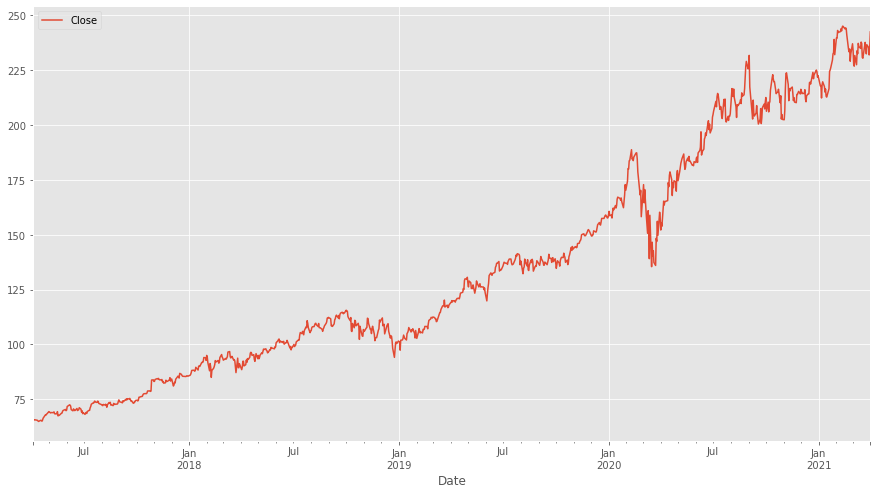

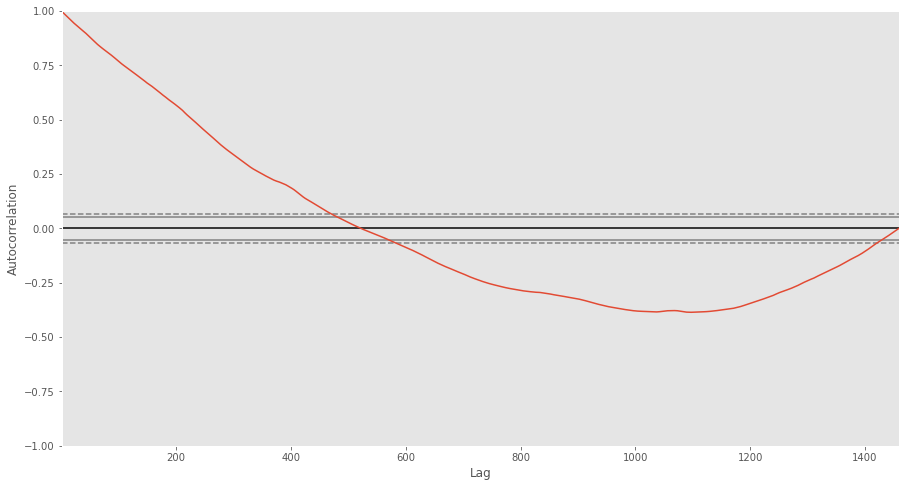

In [732]:
from pandas.plotting import autocorrelation_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

start2 = datetime(2017,4,4)
end2 = datetime(2021,4,4)
arima_df = get_data_from_api("MSFT", start2, end2)
arima_df = arima_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)

#Set index as datetime
arima_df.index = pd.to_datetime(arima_df.index)
#Resample with day to day basis
arima_df = arima_df.resample('D').mean()
#Fill in missing days
arima_df["Close"] = arima_df["Close"].interpolate(method='linear', axis=0).ffill().bfill()
#Set frequency to daily
arima_df.index.freq = 'D'

arima_df.head(10)
print(arima_df.head())
arima_df.plot()
plt.show()

autocorrelation_plot(arima_df)
plt.show()

train_data, test_data = arima_df[0:int(len(arima_df)*0.8)], arima_df[int(len(arima_df)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

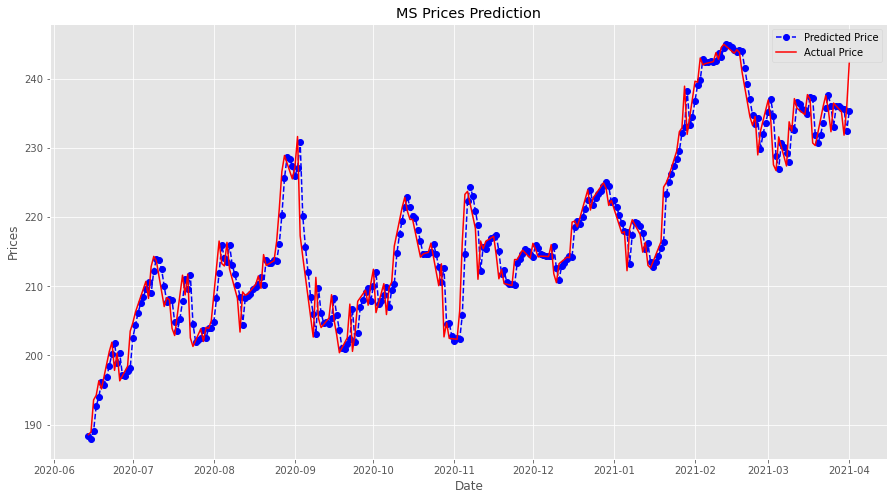

In [708]:
test_set_range = arima_df[int(len(arima_df)*0.8):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('MS Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()
